<a href="https://colab.research.google.com/github/AshrafTasin/CSE-366--Communication-Engineering-Lab/blob/main/task01/pulse_code_modulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Name : Syed Ashraf Al Tasin
##Reg : 2017331014
###Task 01

#Pulse Code Modulation :
Pulse Code Modulation (PCM) is a technique by which analog signal gets converted into digital signal in order to have signal transmission through a digital network.

It is done through 3 steps :
1. Sampling
2. Quantizaiton
3. Encoding

**Sampling :** 

Sampling is the process of reduction of a continuous-time signal to a discrete-time signal. A sample is a value at a point in time and/or space. The analog signal is sampled every *T* second where *T* is the sample period.

**Quantization :**

Quantization is the process of assigning a discrete value from a range of possible values to each sample obtained. The number of possible values will depend on the number of bits used to represent each sample. The process results in a stepped waveform resembling the source signal.

Quantization Process includes:

1. It is assumed that the original analog signal has instantaneous amplitudes between *Vmin* and *Vmax*.

2. The range is then divided into L zones, each of height Δ (delta). 
                        Δ=(vmax-vmin)/L
3. Quantized values of 0 to L − 1 is assigned to the midpoint of each zone.
4. The value of the sample amplitude is approximated to the quantized values.


**Encoding :**

Encoding is the process of representing the quantized values as a binary number in the range 0 to n. The value of n is chosen as a power of 2, depending on the accuracy required.

Please Run Each Cell to see the corresponding result.

#Importing necessary libraries

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

Following is a function to convert a number to corresponding binary value and return a list version of it. This will be needed in the later part of our code.

In [2]:
def dec2binary(x):
    if x==0: 
        return [0]
    
    bits=[]
    
    while x:
        bits.append(x%2)
        x >>=1
    
    return bits[::-1]

#Analog Signal Construction

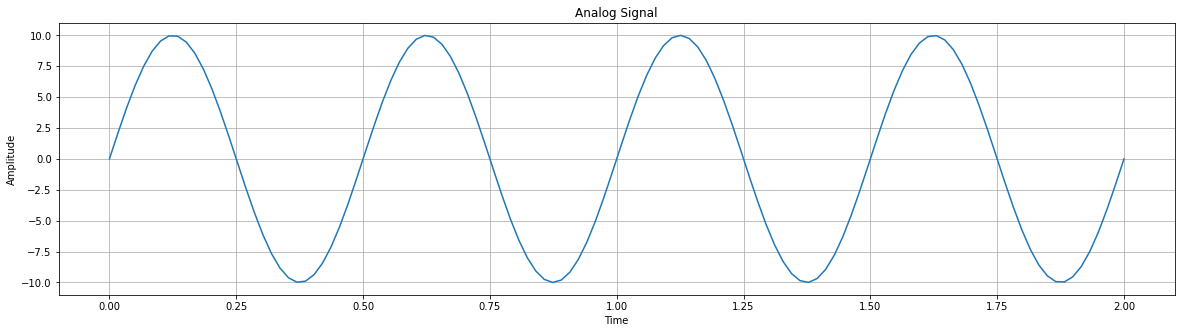

In [3]:
                            ##### For Manual Input #####
# n_bit=int(input("Enter the value of n-bit PCM system : "))
# amplitude=int(input("Enter the Amplitude Value of the sinusoidal : "))
# frequency_sinusoidal=float(input("Enter the Frequency Value of the sinusoidal : "))
# sample_frequency=int(input("Enter Sampling Frequency : "))

                        ##### For Demonstration Purpose #####
n_bit=3
amplitude=10
frequency_sinusoidal=2
sample_frequency=20

T=1/frequency_sinusoidal

ts=np.linspace(0,2.0,120)
xs=amplitude*np.sin(2*np.pi*frequency_sinusoidal*ts)

plt.figure(figsize=(20, 5))
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Analog Signal')
plt.grid('on')
plt.plot(ts,xs)
plt.show()

#Sampling Process

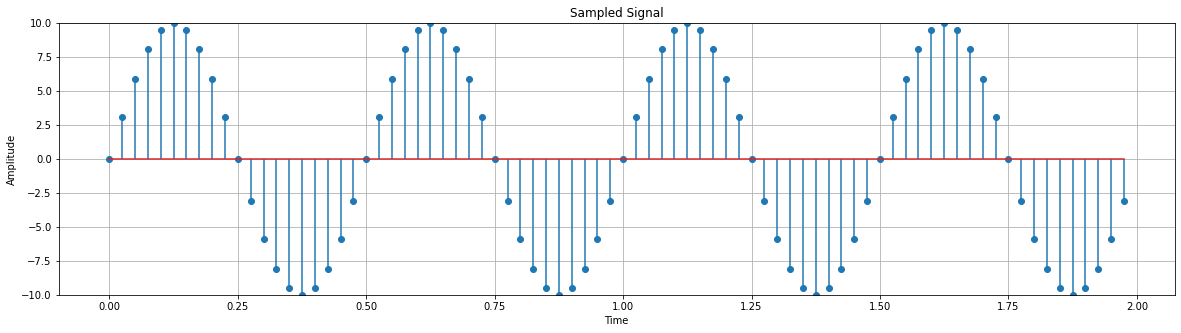

In [4]:
fs=sample_frequency*frequency_sinusoidal
ts=np.arange(0,2,1/fs)
s=amplitude*np.sin(2*np.pi*frequency_sinusoidal*ts)

plt.figure(figsize=(20, 5))
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Sampled Signal')
plt.grid('on')
plt.ylim(-amplitude, amplitude)
plt.stem(ts,s,use_line_collection="true")
plt.show()

#Quantization and Encoding

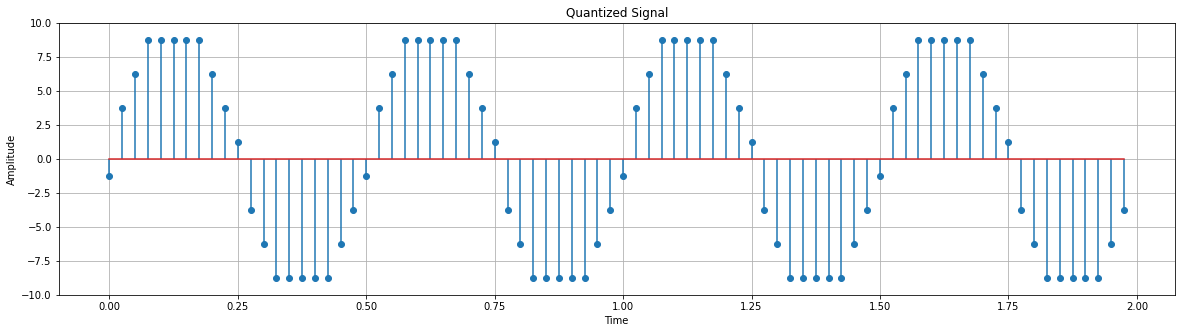

In [5]:
vmin=-amplitude
vmax=-vmin
level=2**n_bit
delta=(vmax-vmin)/level

# partition is an array of equally divided values ranging from vmin to vmax. The difference between 2 values is equal to 'delta' stated above.
partition=np.arange(vmin,vmax+delta,delta)

#midpoint array represents the midpoints of 2 successive numbers from partition array stated above sequentially.
midpoints=np.arange((vmin-(delta/2)),(vmax+(delta/2)+delta),delta)

#encoding_list maps the midpoint values (to be exact, each partition) to a number ranging from 0 to level-1
encoding_list=dict()

#mapping process
for i in range(len(partition)-1):
    item=partition[i+1]
    encoding_list[item]=i

encoding_list[partition[0]]=0
encoding_list[partition[len(partition)-1]]=level-1


encoded_value=[]
quantized_value=[]


for i in range(len(s)):
    item=s[i]

    for j in range(len(partition)):
        if item <= partition[j]:
            index=encoding_list[partition[j]]
            encoded_value.append(index)
            quantized_value.append(midpoints[index+1])
            break


plt.figure(figsize=(20, 5))
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Quantized Signal')
plt.ylim(-amplitude, amplitude)
plt.grid('on')
plt.stem(ts,quantized_value,use_line_collection="true")
plt.show()

#Converting to digital data and transmission

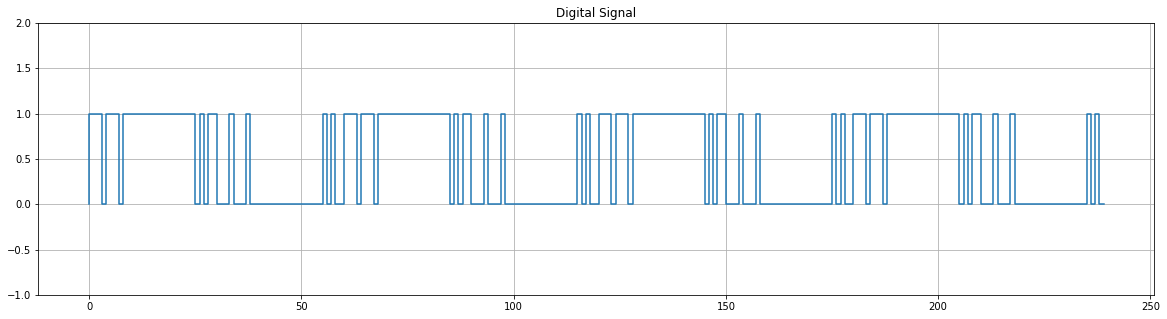

In [6]:
binary=[]

for i in range(len(encoded_value)):
    item=encoded_value[i]
    temp=dec2binary(item)
    
    if(len(temp)<n_bit):
        ran=n_bit-len(temp)
        for i in range(ran):
            temp.insert(0,0)

    for j in range(n_bit):
        binary.append(temp[j])

pos = np.arange(len(binary))
plt.figure(figsize=(20, 5))
plt.title('Digital Signal')
plt.grid('on')
plt.ylim(-1, 2)
plt.step(pos, binary)
plt.show()